In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os, warnings
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')



In [7]:
data = pd.read_csv('myopia.csv')
target = data['MYOPIC']
X = data.drop('MYOPIC', axis='columns')
X.columns



Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [8]:
# Examine shape of the dataframe
X.shape

(618, 14)

In [9]:
# Check for null values in dataframe
X.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
dtype: int64

In [10]:
# Check for duplicates
X.duplicated().sum()

0

In [11]:
# View the datafame
X.head(20)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.700000,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.290000,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.520000,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.730000,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.160000,14,0,0,0,4,4,1,0
5,6,1.744,22.139999,3.224,3.556,15.360000,10,6,2,1,19,44,0,1
6,6,0.683,22.330000,3.186,3.654,15.490000,12,7,2,1,8,36,0,1
7,6,1.272,22.389999,3.732,3.584,15.080000,12,0,0,0,8,8,0,0
8,7,1.396,22.620001,3.464,3.408,15.740000,4,0,3,1,3,12,0,0
9,6,0.972,22.740000,3.504,3.696,15.540000,30,5,1,0,10,27,0,0


In [14]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

In [20]:
pca = PCA(n_components = 0.90)
pca.fit(X_scaled)
reduced = pca.transform(X_scaled)
reduced.shape

(618, 10)

In [21]:
# Create dataframe from the dataset after PCA dimention reduction
myopia_pca_df = pd.DataFrame(data=reduced)
myopia_pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [22]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [58]:
# Further reduce the data with t-SNE for visualization
tsne = TSNE(learning_rate=250)
transformed_features = tsne.fit_transform(reduced)


In [50]:
# Check that dimensions have been reduced to two
transformed_features.shape


(618, 2)

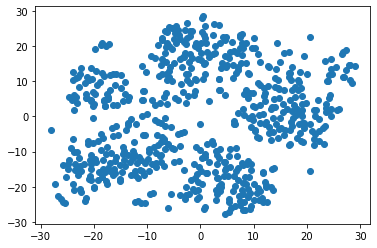

In [51]:
#Create x and y columns of transformed features for plotting
myopia_pca_df["x"] = transformed_features[:,0]
myopia_pca_df["y"] = transformed_features[:,1]

#Visualize the clusters
plt.scatter(myopia_pca_df["x"], myopia_pca_df["y"])
plt.show()


In [59]:

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()



,k,inertia
0,1,258975.083002
1,2,146004.771303
2,3,93678.191036
3,4,63922.004365
4,5,46775.890250


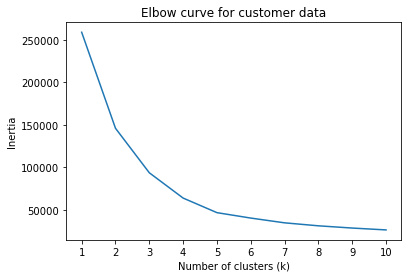

In [56]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')

plt.show()